<a href="https://colab.research.google.com/github/nattaran/health-tequity-case-nasrin/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# ==========================================================
#  Synthetic Blood Pressure Dataset Generator (Day 1)
#  Author: Nasrin Attaran
#  Description:
#     Generates 30 days of synthetic systolic and diastolic
#     blood pressure values for one person, alternating
#     weekly between normal and hypertensive regimes.
# ==========================================================


In [15]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [ ]:
# Set parameters

In [ ]:
AGE = 68                  # age of the person
SEX = "Female"            # sex of the person
NUM_DAYS = 30             # number of days of data
END_DATE = datetime.today().date()  # last date (today)
START_DATE = END_DATE - timedelta(days=NUM_DAYS - 1)

# Fix random seed for reproducibility
np.random.seed(42)


In [ ]:

# ----------------------------------------------------------
# 2. Define blood pressure ranges for different regimes
# ----------------------------------------------------------
# "Normal" values represent healthy blood pressure.
# "Hypertensive" values represent high blood pressure.
# All values are in millimeters of mercury (mmHg).


✅ Synthetic dataset saved as: synthetic_bp_one_person.csv

📄 Dataset preview:
         date  age     sex  systolic_mmHg  diastolic_mmHg  regime  category
0  2025-09-16   68  Female            116              77  normal    normal
1  2025-09-17   68  Female            126              70  normal  elevated
2  2025-09-18   68  Female            123              81  normal  elevated
3  2025-09-19   68  Female            117              79  normal    normal
4  2025-09-20   68  Female            115              71  normal    normal

📊 Category counts:
category
hypertensive    13
normal           9
elevated         8
Name: count, dtype: int64


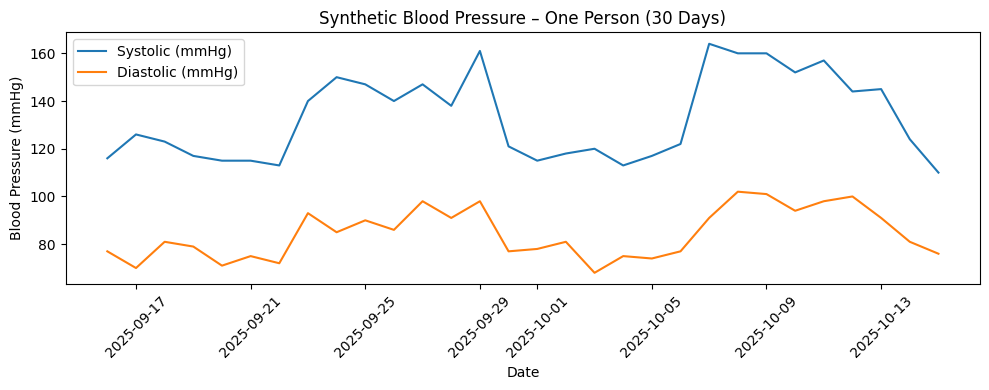

In [ ]:
NORMAL_SYS_RANGE = (112, 128)   # normal systolic range
NORMAL_DIA_RANGE = (70, 82)     # normal diastolic range
HYPER_SYS_RANGE = (138, 162)    # hypertensive systolic range
HYPER_DIA_RANGE = (88, 102)     # hypertensive diastolic range

# Standard deviation for daily random noise (small variations)
SYS_NOISE_SD = 3.0
DIA_NOISE_SD = 2.0

# ----------------------------------------------------------
# 3. Create daily date range
# ----------------------------------------------------------
dates = pd.date_range(start=START_DATE, end=END_DATE, freq="D")

# ----------------------------------------------------------
# 4. Assign weekly "regime" pattern
# ----------------------------------------------------------
# Week 1 -> normal, Week 2 -> hypertensive, Week 3 -> normal, etc.
weeks = ((np.arange(NUM_DAYS)) // 7) % 2
regime = np.where(weeks == 0, "normal", "hypertensive")

# ----------------------------------------------------------
# 5. Generate random systolic and diastolic values
# ----------------------------------------------------------

def sample_range(low, high, size):
    """Sample random values uniformly between low and high."""
    return np.random.uniform(low, high, size)

# Generate base values according to the regime
systolic_base = np.where(
    regime == "normal",
    sample_range(*NORMAL_SYS_RANGE, NUM_DAYS),
    sample_range(*HYPER_SYS_RANGE, NUM_DAYS)
)

diastolic_base = np.where(
    regime == "normal",
    sample_range(*NORMAL_DIA_RANGE, NUM_DAYS),
    sample_range(*HYPER_DIA_RANGE, NUM_DAYS)
)

# Add daily random noise for realism
systolic = np.clip(systolic_base + np.random.normal(0, SYS_NOISE_SD, NUM_DAYS), 90, 220)
diastolic = np.clip(diastolic_base + np.random.normal(0, DIA_NOISE_SD, NUM_DAYS), 50, 140)

# Ensure diastolic < systolic (always true in real BP)
overlaps = diastolic >= systolic
diastolic[overlaps] = systolic[overlaps] - np.random.uniform(5, 15, overlaps.sum())

# ----------------------------------------------------------
# 6. Assign category based on BP thresholds
# ----------------------------------------------------------
# According to standard definitions:
# - Normal: systolic < 120 and diastolic < 80
# - Elevated: systolic 120–139 or diastolic 80–89
# - Hypertensive: systolic >= 140 or diastolic >= 90

category = np.where(
    (systolic >= 140) | (diastolic >= 90), "hypertensive",
    np.where((systolic < 120) & (diastolic < 80), "normal", "elevated")
)

# ----------------------------------------------------------
# 7. Create final DataFrame
# ----------------------------------------------------------
df = pd.DataFrame({
    "date": dates.date,
    "age": AGE,
    "sex": SEX,
    "systolic_mmHg": np.round(systolic, 0).astype(int),
    "diastolic_mmHg": np.round(diastolic, 0).astype(int),
    "regime": regime,
    "category": category
})

# Reorder columns for clarity
df = df[["date", "age", "sex", "systolic_mmHg", "diastolic_mmHg", "regime", "category"]]

# ----------------------------------------------------------
# 8. Save dataset and display sample
# ----------------------------------------------------------
csv_path = "synthetic_bp_one_person.csv"
df.to_csv(csv_path, index=False)

print(f"✅ Synthetic dataset saved as: {csv_path}")
print("\n📄 Dataset preview:")
print(df.head())

print("\n📊 Category counts:")
print(df["category"].value_counts())

# ----------------------------------------------------------
# 9. Visualize the generated data
# ----------------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["systolic_mmHg"], label="Systolic (mmHg)")
plt.plot(df["date"], df["diastolic_mmHg"], label="Diastolic (mmHg)")
plt.title("Synthetic Blood Pressure – One Person (30 Days)")
plt.xlabel("Date")
plt.ylabel("Blood Pressure (mmHg)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 10. Notes:
# ----------------------------------------------------------
# - This dataset is fully synthetic and for demonstration only.
# - "Regime" alternates weekly between normal and hypertensive.
# - "Category" labels are derived from actual numeric values.
# - Random seed ensures reproducibility.
